<a href="https://colab.research.google.com/github/NoeliaEch/IA2022_Noe/blob/main/Neural_Networks/IA_NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![separador](https://i.imgur.com/4gX5WFr.png)
## Redes Neuronales para regresión

Vamos a utilizar funcionalidades de las siguientes librerías
* Numpy
* Matplotlib
* Seaborn
* Pandas
* Sklearn
* Keras

![separador](https://i.imgur.com/4gX5WFr.png)

### Notebook de Noe 👻👻
![separador](https://i.imgur.com/4gX5WFr.png)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

![separador](https://i.imgur.com/4gX5WFr.png)

Por ahora vamos a trabajar con un Toy Dataset. Para cargarlo y poder trabajar con él debemos poner `datasets.load_boston()` <br>

Al hacerlo, se carga en una variable un objeto de tipo `bunch`. Hay 4 keys relevantes en este objeto.
> * `data`
* `target`
* `feature_names`
* `DESCR`

![separador](https://i.imgur.com/4gX5WFr.png)

### **Feature Names**

**¿Qué significan los feature names?** <br>

* **CRIM** = Tasa de crimen per-capita del barrio
* **ZN** = proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
* **INDUS** = proporción de acres de negocios no minoristas por ciudad
* **CHAS** = variable ficticia de Charles River (= 1 si el tramo limita el río, 0 de lo contrario)
* **NOX** =  concentración de óxidos nítricos (partes por 10 millones)
* **RM** = número promedio de habitaciones por vivienda
* **AGE** = proporción de unidades ocupadas por sus propietarios construidas antes de 1940
* **DIS** = Distancias ponderadas a cinco centros de empleo de Boston
* **RAD** = índice de accesibilidad a las autopistas radiales
* **TAX** = Tasa de impuesto a la propiedad de valor total por $ 10,000
* **PTRATIO** =  colegios por localidad
* **B** =  1000 (Bk - 0,63)^ 2, donde Bk es la proporción de negros por ciudad
* **LSTAT** = porcentaje del status mas bajo de la poblacion

Disclaimer: Este dataset tiene algunas columnas controversiales, de índole racista.

![separador](https://i.imgur.com/4gX5WFr.png)


In [2]:
boston = datasets.load_boston()
print("------------------------------------------------------------------------------")
print("type(boston) = ", type(boston))
print("------------------------------------------------------------------------------")
print("boston.keys() = ", boston.keys())
print("------------------------------------------------------------------------------")
print("boston.data.shape = ", boston.data.shape)
print("------------------------------------------------------------------------------")
print("boston.feature_names = ", boston.feature_names)
print("------------------------------------------------------------------------------")

------------------------------------------------------------------------------
type(boston) =  <class 'sklearn.utils.Bunch'>
------------------------------------------------------------------------------
boston.keys() =  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
------------------------------------------------------------------------------
boston.data.shape =  (506, 13)
------------------------------------------------------------------------------
boston.feature_names =  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

![separador](https://i.imgur.com/4gX5WFr.png)
### Transformamos a Pandas DataFrame

![separador](https://i.imgur.com/4gX5WFr.png)

In [3]:
# Cramos el DataFrame y le asignamos el nombre de las columnas
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# Si quisieramos agregar la columna de targets en el dataframe, hay que hacer
boston_df['PRICE'] = pd.Series(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


![separador](https://i.imgur.com/4gX5WFr.png)

# Preprocesamiento

(suele ser necesario, pero no lo vamos a ejecutar en clase)

![separador](https://i.imgur.com/4gX5WFr.png)


---
#### Buscamos missing values

---

In [4]:
# buscamos valores nulos 
print(boston_df.isnull().sum()) # --> NO hay valores nulos

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


---
Mostramos la estadística del dataset

---

In [5]:
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

---

#### Exploramos los datos

El precio de las casas tiene una distribución "similar" a una distribución normal, con algunos outliers.

---

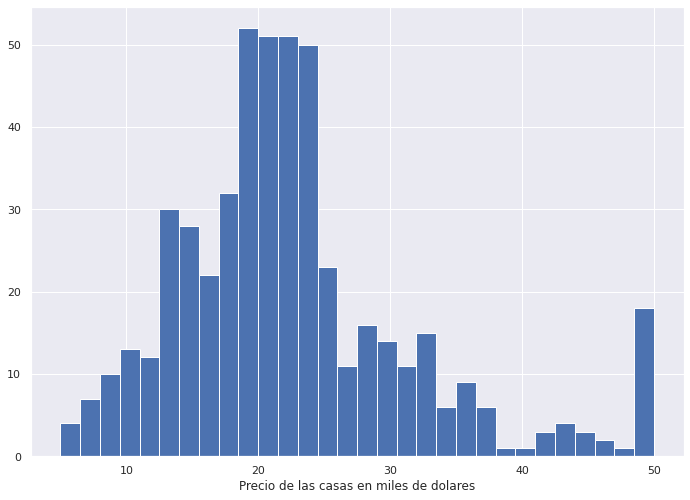

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(boston_df['PRICE'], bins=30)
plt.xlabel("Precio de las casas en miles de dolares")
plt.show()

---
#### Mapa de Calor (HeatMap) - Correlaciones entre las columnas. 

---
Podemos observar altas correlaciones entre el precio (PRICE) y :
* RM (correlacion 0.7)  --> cantidad de habitaciones
* LSTAT (correlacion -0.74) --> Porcentaje del nivel mas bajo de la poblacion
* PTRATIO (correlacion -0.51) --> Cantidad de colegios en la ciudad
* TAX (correlacion -0.47) --> impuestos

---

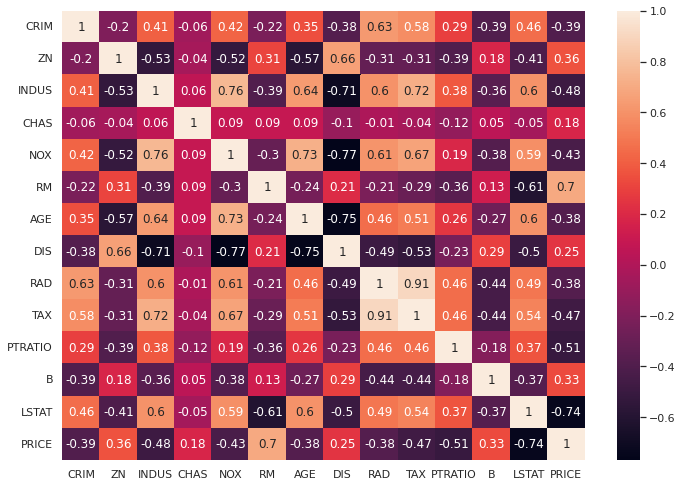

In [7]:
# Vamos a ver las correlaciones entre el precio y los features
correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

---
#### Graficamos los features candidatos a entrenar nuestra red

---

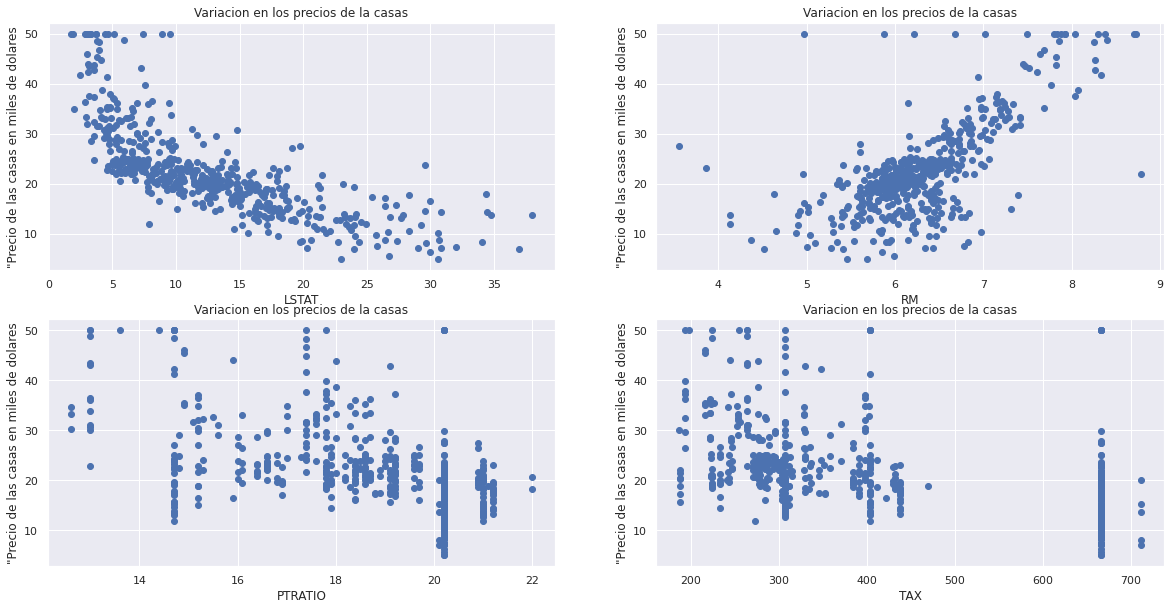

In [8]:
plt.figure(figsize=(20, 10))

features = ['LSTAT', 'RM', 'PTRATIO', 'TAX']
target = boston_df['PRICE']

for i, col in enumerate(features):
    plt.subplot(2, 2 , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variacion en los precios de la casas")
    plt.xlabel(col)
    plt.ylabel('"Precio de las casas en miles de dolares')

---
Al graficar nos damos cuenta que:<br>
* El precio de la casa se incrementa con el número de habitaciones (RM)
* El precio se decrementa cuanto más empobrecida está la zona (LSTAT)

* PTRATIO y TAX no nos brindan demasiada información del precio de la casa

---

Para entrenar nuestra red vamos a utilizar RM y LSTAT

---

![separador](https://i.imgur.com/4gX5WFr.png)
# Funciones para entrenamiento

Vamos a definir algunas funciones para trabajar

![separador](https://i.imgur.com/4gX5WFr.png)

Armado de modelo para regresion:

```python
model = Sequential()
model.add(Dense(128, input_dim=n_train_dim, activation='relu'))    
model.add(Dense(1, activation='linear'))

    
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
```


Entrenamiento del modelo:

```python
result = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1)

```

Para obtener los resultados de loss:

```python
loss = result.history['loss']
val_loss = result.history['val_loss']
```

Para ver los resultados de la métrica:

```python
mae = result.history['mae']    
val_mae = result.history['val_mae']

```

Para hacer predicciones sobre conjunto de test:

```python
predictions = model.predict(X_test)
```

![separador](https://i.imgur.com/4gX5WFr.png)

In [9]:
def myModel(X, y, random_state=1, scale=True, test_size=0.1):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=test_size)
    scaler = StandardScaler().fit(X_train)

    if scale:
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test) # cuidado, al aplicad el standard scaler, los datos dejan de ser dataframes    

    n_train_samples, n_train_dim = X_train.shape


    # Para regresion utilizamos una unica capa oculta
    model = Sequential()
    model.add(Dense(128, input_dim=n_train_dim, activation='relu'))    
    model.add(Dense(1, activation='linear'))

    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    model.summary()

    return model, X_train, X_test, y_train, y_test

In [10]:

def trainMyModel(model, X_train, y_train):

    result = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1)
    
    print("history.keys = ",result.history.keys())
    
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(7,7))
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Square Error')
    plt.legend()
    plt.show()


    mae = result.history['mae']    
    val_mae = result.history['val_mae']

    
    plt.figure(figsize=(7,7))
    plt.plot(epochs, mae, 'y', label='Training MAE')
    plt.plot(epochs, val_mae, 'r', label='Validation MAE')
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

In [11]:
def makePredictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    y_test = np.array(y_test)
   
    predicted_value = np.array(predictions)
    predicted_value = predicted_value.reshape(max(predicted_value.shape), )

    return predicted_value

In [12]:

def plotPredictionsOnTwoAxes(predicted_value, X_test, y_test):

    data = np.array(X_test)  # ploteo con los datos sin estandarizar

    if (X_test.shape[1]==2) :
        data1 = data[:, 0]
        data2 = data[:, 1]
    else: 
        data1 = data[:, 5]
        data2 = data[:, 12]
    true_value = np.array(y_test)
    plt.subplot(2, 1 , 1)
    plt.scatter(data1, true_value, marker='o', c='r')   
    plt.scatter(data1, predicted_value, marker='o', c='b')
    plt.ylabel('"Precio de las casas en miles de dolares')
    plt.subplot(2, 1 , 2)
    plt.scatter(data2, true_value, marker='o', c='r')
    plt.scatter(data2, predicted_value, marker='o', c='b')
    plt.ylabel('"Precio de las casas en miles de dolares')
    plt.suptitle("Estimación de precios de casas - azul true value - red estimated value [DATOS DE TESTEO]")
    return data1, data2

In [21]:
def plotPredictionsSeparated(predicted_value, X_test, y_test):

    data = np.array(X_test)  # ploteo con los datos sin estandarizar

    if (X_test.shape[1]==2) :
        data1 = data[:, 0]
        data2 = data[:, 1]
    else: 
        data1 = data[:, 5]
        data2 = data[:, 12]
    true_value = np.array(y_test)
    plt.subplot(2, 2 , 1)
    plt.scatter(data1, true_value, marker='o', c='r')   
    plt.ylabel('Precio en miles de dolares')
    plt.title("True")
    plt.subplot(2, 2 , 2)
    plt.scatter(data1, predicted_value, marker='o', c='b')
    plt.ylabel('Precio en miles de dolares')
    plt.title("Predicted")
    plt.subplot(2, 2 , 3)
    plt.scatter(data2, true_value, marker='o', c='r')
    plt.ylabel('Precio en miles de dolares')
    plt.title("True")
    plt.subplot(2, 2 , 4)
    plt.scatter(data2, predicted_value, marker='o', c='b')
    plt.ylabel('Precio en miles de dolares')
    plt.title("Predicted")
    plt.suptitle("Estimación de precios de casas - azul true value - red estimated value [DATOS DE TESTEO]")
    return data1, data2

In [13]:

def plotTwoModels(data11, data12, true_value, predicted_value1, data21, data22, predicted_value2):
    plt.figure(figsize=(15,12))
    plt.subplot(2, 2 , 1)
    plt.scatter(data11, true_value, marker='o', c='r')
    plt.scatter(data11, predicted_value1, marker='o', c='b')
    plt.ylabel('Precio de las casas en miles de dolares')
    plt.title("True value - 2 parametros de entrenamiento - PRICE VS RM")
    plt.subplot(2, 2 , 2)
    plt.scatter(data12, true_value, marker='o', c='r')
    plt.scatter(data12, predicted_value1, marker='o', c='b')
    plt.ylabel('Precio de las casas en miles de dolares')
    plt.title("Predicted value - 2 parametros de entrenamiento - PRICE VS LSTAT")
    plt.suptitle("Estimación de precios de casas - azul true value - red estimated value [DATOS DE TESTEO]")
    plt.subplot(2, 2 , 3)
    plt.scatter(data21, true_value, marker='o', c='m')
    plt.scatter(data21, predicted_value2, marker='o', c='c')
    plt.ylabel('Precio de las casas en miles de dolares')
    plt.title("True value - 13 parametros de entrenamiento - PRICE VS RM")
    plt.subplot(2, 2 , 4)
    plt.scatter(data22, true_value, marker='o', c='m')
    plt.scatter(data22, predicted_value2, marker='o', c='c')
    plt.ylabel('"Precio de las casas en miles de dolares')
    plt.title("Predicted value - 13 parametros de entrenamiento - PRICE VS LSTAT")
    plt.suptitle("Estimación de precios de casas - Red entrenada con 2 parametros - Red Entrenada con 13 parametros")

![separador](https://i.imgur.com/4gX5WFr.png)
### **Modelo 1**

#### 2 features de entrenamiento

* `RM`
* `LSTAT`


![separador](https://i.imgur.com/4gX5WFr.png)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 515.5137 - mae: 20.7718 - val_loss: 445.0312 - val_mae: 18.5268
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 427.0638 - mae: 18.1248 - val_loss: 364.2650 - val_mae: 15.9362
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 354.9045 - mae: 15.7751 - val_loss: 302.8840 - val_mae: 13.7529
Epoch 4/100
12/12 [=======================

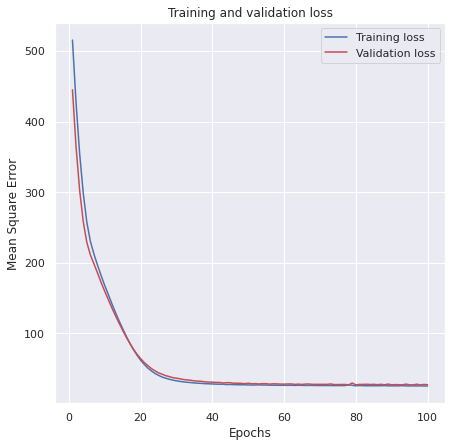

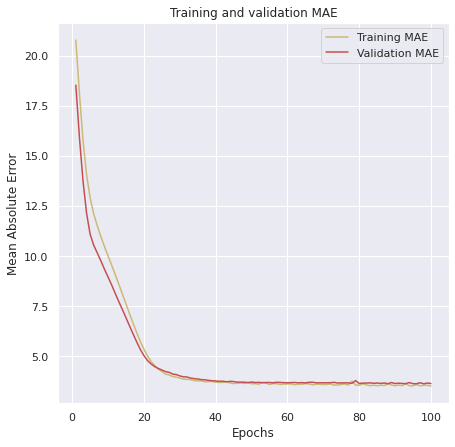

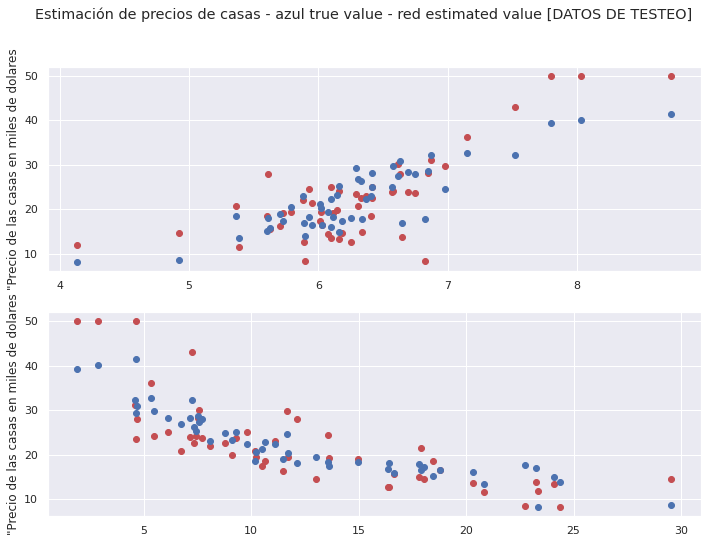

In [14]:
X = boston_df[["RM", "LSTAT"]]
y = boston_df["PRICE"]  # no es lo mismo que tenga 1 par de corchetes o dos pares de corchetes
model, X_train, X_test, y_train, y_test = myModel(X, y, random_state=1, scale=False)
trainMyModel(model, X_train, y_train)
predicted_value = makePredictions(model, X_test, y_test)
data11, data12 = plotPredictionsOnTwoAxes(predicted_value, X_test, y_test)

(array([6.849, 6.696, 6.03 , 5.878, 5.362, 6.372, 6.63 , 6.072, 5.951,
        6.417, 6.75 , 6.874, 5.731, 5.787, 6.023, 5.608, 6.649, 8.725,
        6.162, 4.926, 5.705, 5.628, 6.567, 6.415, 6.29 , 5.896, 6.096,
        6.014, 7.52 , 5.39 , 6.579, 5.605, 8.034, 6.251, 6.144, 5.926,
        6.341, 7.147, 4.138, 6.114, 6.333, 6.31 , 6.618, 6.162, 6.185,
        6.824, 7.802, 5.887, 6.101, 6.405, 6.98 ]),
 array([ 7.53,  7.18, 18.8 ,  8.1 , 10.19, 11.12,  4.7 , 13.04, 17.92,
         8.81,  7.74,  4.61, 13.61, 10.24, 11.72, 12.13, 23.24,  4.63,
         7.43, 29.53, 11.5 , 16.65,  9.28,  6.12,  4.67, 24.39, 20.34,
        10.53,  7.26, 20.85,  5.49, 18.46,  2.88, 16.44,  9.09, 13.59,
        17.79,  5.33, 23.34, 14.98,  7.34,  6.75,  7.6 , 24.1 , 18.03,
        22.74,  1.92, 16.35,  9.81, 10.63, 11.66]))

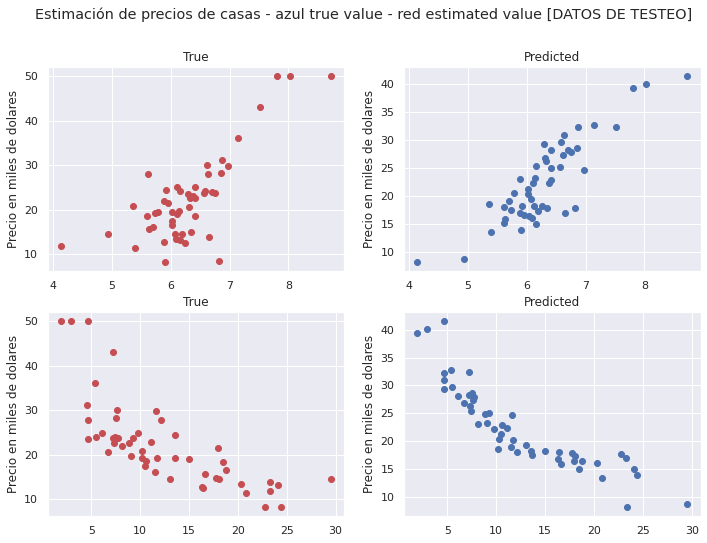

In [22]:
plotPredictionsSeparated(predicted_value, X_test, y_test)

![separador](https://i.imgur.com/4gX5WFr.png)
### **Modelo 2**

#### 13 features de entrenamiento

![separador](https://i.imgur.com/4gX5WFr.png)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1792      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 580.7036 - mae: 22.3652 - val_loss: 544.9689 - val_mae: 21.3615
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 552.0499 - mae: 21.7300 - val_loss: 517.2964 - val_mae: 20.7319
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 522.7181 - mae: 21.0571 - val_loss: 488.4994 - val_mae: 20.0504
Epoch 4/100
12/12 [=================

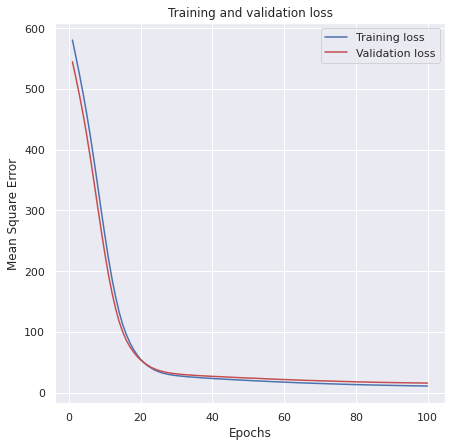

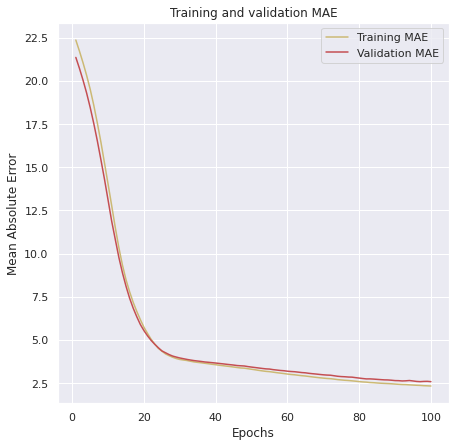

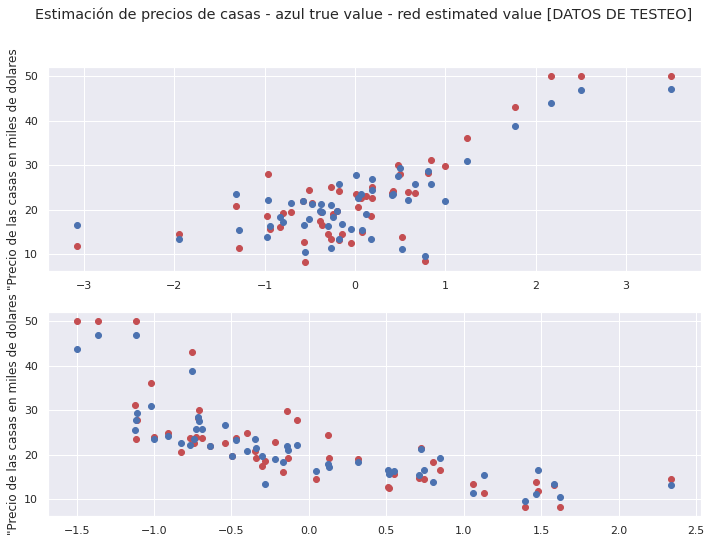

In [15]:
# Prueba 2 --> 13 datos como features
X1 = boston_df[["CRIM", "ZN" , "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
y1 = boston_df["PRICE"]  # no es lo mismo que tenga 1 par de corchetes o dos pares de corchetes
model1, X1_train, X1_test, y1_train, y1_test = myModel(X1, y1, random_state=1, scale=True)
trainMyModel(model1, X1_train, y1_train)
predicted_value1 = makePredictions(model1, X1_test, y1_test)
data21, data22 = plotPredictionsOnTwoAxes(predicted_value1, X1_test, y1_test)

(array([ 0.80948285,  0.59035789, -0.36348021, -0.58117299, -1.32018269,
         0.12632854,  0.49583339, -0.30332826, -0.47662317,  0.19077706,
         0.66769611,  0.84528759, -0.79170482, -0.71150222, -0.37350554,
        -0.96786411,  0.52304499,  3.49627005, -0.17443122, -1.94461723,
        -0.82894174, -0.93922032,  0.40560546,  0.18791268,  0.00888902,
        -0.55539358, -0.26895571, -0.38639524,  1.7704819 , -1.28008138,
         0.42279173, -0.97216068,  2.50662722, -0.04696637, -0.20021063,
        -0.5124279 ,  0.08193067,  1.23627528, -3.07318243, -0.24317631,
         0.07047316,  0.0375328 ,  0.47864712, -0.17443122, -0.14149086,
         0.77367812,  2.17435929, -0.56828328, -0.26179477,  0.17359079,
         0.99709966]),
 array([-0.71650549, -0.76509904,  0.84820699, -0.63736741, -0.34719447,
        -0.21807445, -1.10941909,  0.04849591,  0.72602891, -0.53879192,
        -0.68734936, -1.12191458,  0.12763399, -0.34025253, -0.13477121,
        -0.07784733,  1.4646

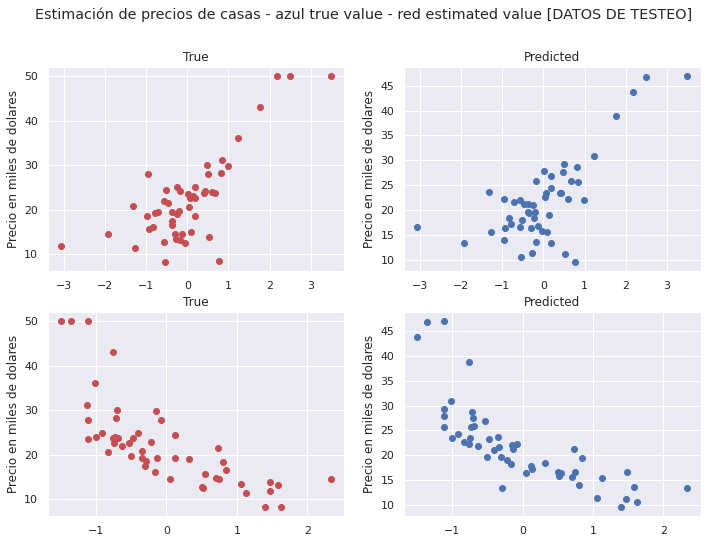

In [23]:
plotPredictionsSeparated(predicted_value1, X1_test, y1_test)


![separador](https://i.imgur.com/4gX5WFr.png)
### Ploteamos los resultados de los dos modelos


![separador](https://i.imgur.com/4gX5WFr.png)

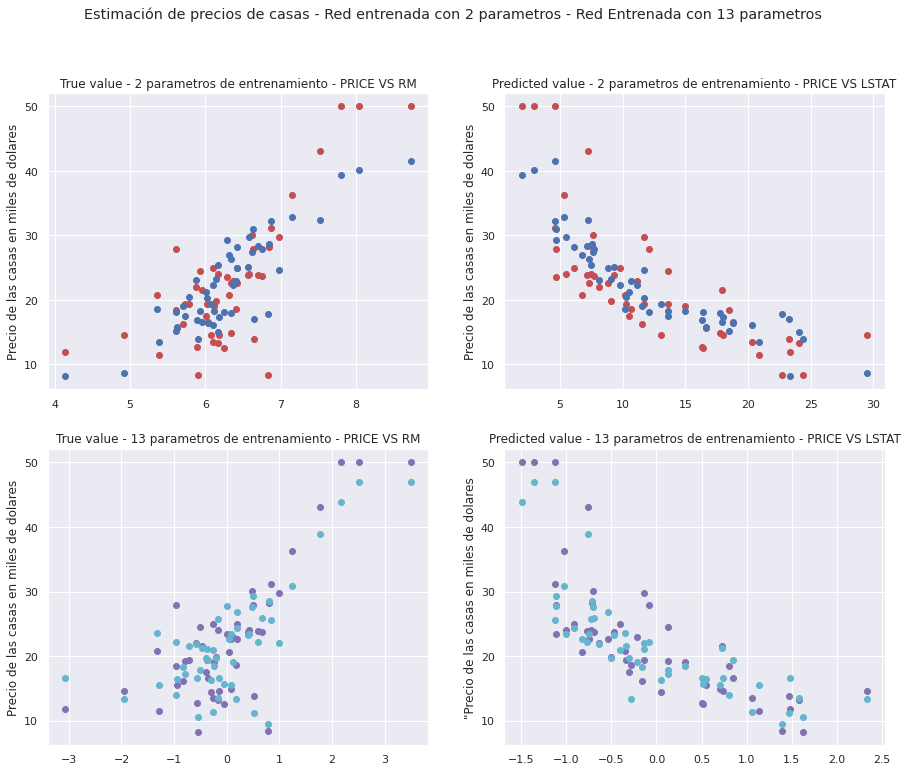

In [16]:
plotTwoModels(data11, data12, y_test, predicted_value, data21, data22, predicted_value1)

![separador](https://i.imgur.com/4gX5WFr.png)

## Fin

![separador](https://i.imgur.com/4gX5WFr.png)